## Однофакторный дисперсионный анализ (One-way ANOVA)  
В тех случаях, когда групп становится больше двух, t-критерий перестаёт быть нам полезен.  
Для таких случаев был создан дисперсионный анализ – он выполняет ту же функцию, но подходит для числа групп больше двух.

Требования к данным:  
* Дисперсии внутри наших групп должны быть примерно одинаковы (требование гомогенности дисперсий).  
Проверить можно с помощью критерия Левена и критерия Бартлетта.
* Если объемы групп недостаточно большие (меньше 30), то важно соблюдать требование о нормальности распределения выборок.

Допустим, нам захотелось сравнить между собой три выборочных средних X1, X2, X3.

In [1]:
import numpy as np
import scipy.stats as st

s1 = np.array([3, 1, 2])
s2 = np.array([5, 3, 4])
s3 = np.array([7, 6, 5])

GROUP_COUNT = 3

mean1 = np.mean(s1)
mean2 = np.mean(s2)
mean3 = np.mean(s3)

H0: ни одно из выборочных средних не отличается от другого (нет различий)  
M1 = M2 = M3  
H1: хотя бы одно выборочное среднее отличается от других (есть различия как минимум между двумя группами)  
!(M1 = M2 = M3)

Помимо уже указанных выборочных средних, мы будем работать со средним всех наблюдений – то есть мы рассчитываем среднее не только для каждой группы,  
но и среднее по всем группам сразу.

In [2]:
all_samples = np.concatenate((s1, s2, s3), axis=None)
mean_all = np.mean(all_samples)

После этого считаем так называемую общую сумму квадратов (SST, total sum of squares) –  
вычитаем из среднего всех наблюдений каждое индивидуальное наблюдение, разницу возводим в квадрат  
и суммируем все квадраты разниц. Таким образом, у нас получилась мера того,  
насколько сильно наблюдения отклоняются друг от друга и это можно считать аналогом дисперсии.  
Количество степеней свободы для SST рассчитывается как количество наблюдений (N) минус 1.

In [3]:
SST = np.sum((all_samples - mean_all) ** 2)
df_SST = len(all_samples) - 1

Общая сумма квадратов, по сути, складывается из двух разных источников изменчивости.  
Во-первых, индивидуальные данные могут различаться между собой в рамках одной группы – внутригрупповая сумма квадратов (SSW, sum of squares within groups).  
Во-вторых, они могут различаться между несколькими группами – межгрупповая сумма квадратов (SSB, sum of squares between groups – иногда это называют SSA, sum of squares among groups).  
SSB больше SSW будет означать, что значения между группами различаются больше, чем внутри группы => группы значимо различаются между собой.

In [4]:
SSW = np.sum((s1 - mean1) ** 2) + np.sum((s2 - mean2) ** 2) + np.sum((s3 - mean3) ** 2)
df_SSW = len(all_samples) - GROUP_COUNT

SSB = GROUP_COUNT * ((mean1 - mean_all) ** 2) + GROUP_COUNT * ((mean2 - mean_all) ** 2) + GROUP_COUNT * ((mean3 - mean_all) ** 2)
df_SSB = GROUP_COUNT - 1

print(f'SSW: {SSW}; SSB: {SSB}')
if (SSB > SSW):
    print('groups vary significantly')
else:
    print('groups do not differ')

SSW: 6.0; SSB: 24.0
groups vary significantly


Формально это выражается через так называемую F-статистику:

In [5]:
MeanSqBg = (SSB / df_SSB)
MeanSqWg = (SSW / df_SSW)
f = MeanSqBg / MeanSqWg
print('f:', f)

f: 12.0


Предполагаем, что нулевая гипотеза верна. В таком случае SSW было бы каким-то фиксированным значением,  
а SSB бы стремилось к нулю => F-статистика бы тоже стремилась к нулю. Соответственно, мы можем проверить,  
как полученная нами F-статистика соотносится с соответствующим ему F-распределением. Зная F-статистику и  
соответствующее число степеней свободы, мы можем рассчитать соответствующий р-уровень значимости,  
который скажет нам  какая вероятность получить такое или еще более выраженное отличие между несколькими средними,  
если на деле верна нулевая гипотеза:

In [6]:
p_value = st.f.sf(f, df_SSB, df_SSW)
print('p_value:', p_value)

alpha = 0.05
if p_value > alpha:
    print(f'p_value(X > {f:.2f}) > alpha. Do not reject H0')
else:
    print(f'p_value(X > {f:.2f}) < alpha. Reject H0')

p_value: 0.008000000000000002
p_value(X > 12.00) < alpha. Reject H0


In [7]:
print(st.f_oneway(s1, s2, s3))

F_onewayResult(statistic=12.0, pvalue=0.008000000000000002)


### Задача  
Генотерапия позволяет корректировать работу дефективного гена, ответственного за развитие заболевания.  
В резульате эксперимента сравнивались эффективность четырёх различных типов терапии.

In [8]:
import pandas as pd

genetherapy_data = pd.read_csv('./data/genetherapy.csv')
samples = [list(frame) for group, frame in genetherapy_data.groupby('Therapy')['expr']]

# H0: M1 = M2 = M3 = M4
# H1: !(M1 = M2 = M3 = M4)
alpha = 0.05

result = st.f_oneway(*samples)

f = result.statistic
print('f:', f)

p_value = result.pvalue
print('p_value:', p_value)

if p_value > alpha:
    print(f'p_value(X > {f:.2f}) > alpha. Do not reject H0')
else:
    print(f'p_value(X > {f:.2f}) < alpha. Reject H0')

f: 8.03730248114399
p_value: 0.00015249722895229536
p_value(X > 8.04) < alpha. Reject H0


<AxesSubplot:xlabel='Therapy', ylabel='expr'>

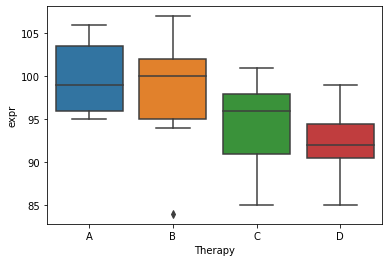

In [9]:
import seaborn as sns

sns.boxplot(data=genetherapy_data, y='expr', x='Therapy')

<AxesSubplot:xlabel='Therapy', ylabel='expr'>

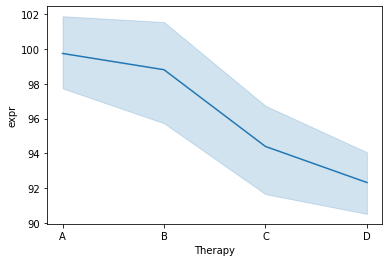

In [10]:
sns.lineplot(x='Therapy', y='expr', data=genetherapy_data)

<AxesSubplot:xlabel='Therapy', ylabel='expr'>

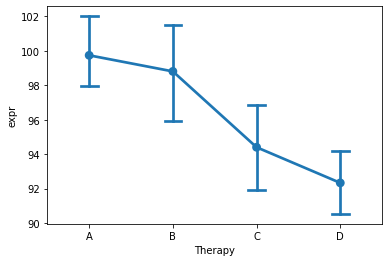

In [11]:
sns.pointplot(x='Therapy', y='expr', data=genetherapy_data, capsize=.2)

### Задача
При уровне значимости α = 0,05 методом дисперсионного анализа проверить нулевую гипотезу  
о влиянии фактора на качество объекта на основании пяти измерений для трех уровней фактора Ф1 – Ф3

In [12]:
s1 = [18, 28, 12, 14, 32]
s2 = [24, 36, 28, 40, 16]
s3 = [36, 12, 22, 45, 40]

# H0: M1 = M2 = M3
# H1: !(M1 = M2 = M3)
alpha = 0.05

result = st.f_oneway(s1, s1, s3)
f = result.statistic
print('f:', f)

p_value = result.pvalue
print('p_value:', p_value)

if p_value > alpha:
    print(f'p_value(X > {f:.2f}) > alpha. Do not reject H0')
else:
    print(f'p_value(X > {f:.2f}) < alpha. Reject H0')

f: 1.5282021151586365
p_value: 0.25630665330703495
p_value(X > 1.53) > alpha. Do not reject H0


<AxesSubplot:>

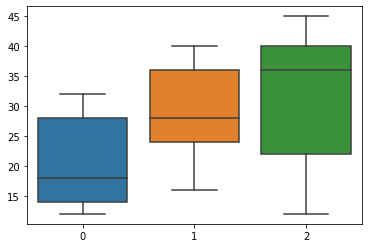

In [13]:
sns.boxplot(data=[s1, s2, s3])

<AxesSubplot:>

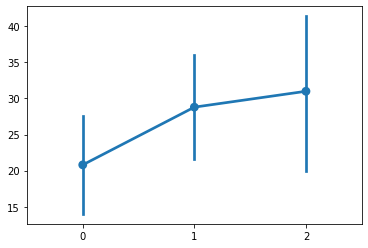

In [14]:
sns.pointplot(data=[s1, s2, s3])

## Критерий Тьюки  
Фактически рассчитывается по той же формуле, что и t-критерий, но несколько иначе рассчитывается стандартная ошибка –   
в результате критерий Тьюки более консервативен, чем обычный t-критерий, но гораздо менее консервативен по сравнению с поправкой Бонферрони.

In [15]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

MultiComp = MultiComparison(genetherapy_data['expr'], genetherapy_data['Therapy'])
print(MultiComp.tukeyhsd().summary())
# print(pairwise_tukeyhsd(столбец_с_данными, столбец_с_обозначениями_групп))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  -0.9333    0.9  -5.5961  3.7294  False
     A      C  -5.3333 0.0189  -9.9961 -0.6706   True
     A      D     -7.4  0.001 -12.0628 -2.7372   True
     B      C     -4.4 0.0712  -9.0628  0.2628  False
     B      D  -6.4667 0.0029 -11.1294 -1.8039   True
     C      D  -2.0667 0.6296  -6.7294  2.5961  False
-----------------------------------------------------


* group1 и group2 - названия групп, которые сравниваются в рамках теста
* meandiff - разница между значением 2 группы и значением 1 группы
* p-adj - скорректированный порог значимости
* lower и upper - нижняя и верхняя границы доверительного интервала различий в средних
* reject - отвергается нулевая гипотеза или нет

## Непараметрический аналог One-way ANOVA — критерий Краскела-Уоллиса  
Предназначен для проверки равенства средних нескольких выборок.  
Данный критерий является многовыборочным обобщением критерия Уилкоксона-Манна-Уитни.  
Критерий Краскела-Уоллиса является ранговым, поэтому он инвариантен по отношению к любому монотонному преобразованию шкалы измерения.  

Требования к данным:  
* Все с выборок случайно и независимо друг от друга извлекаются из соответствующих генеральных совокупностей.
* Анализируемая переменная является непрерывной.
* Наблюдения допускают ранжирование как внутри, так и между группами.


### Задача  
Методом критерия Краскела-Уоллиса проверить нулевую гипотезу о влиянии поставщика  
синтетических волокон на прочность изготавливаемых парашютов.  
Прочность парашютов не является нормально распределенной случайной величиной.

In [16]:
p1 = [18.5, 24, 17.2, 19.9, 18.0]
p2 = [26, 25.3, 24, 21.2, 24.5]
p3 = [20.6, 25.2, 20.8, 24.7, 22.9]
p4 = [25.4, 19.9, 22.6, 17.5, 20.4]

# H0: M1 = M2 = M3 = M4
# H1: !(M1 = M2 = M3 = M4)
alpha = 0.05

result = st.kruskal(p1, p2, p3, p4)

h = result.statistic
print('h:', h)

p_value = result.pvalue
print('p_value:', p_value)

if p_value > alpha:
    print(f'p_value(X > {h:.2f}) > alpha. Do not reject H0')
else:
    print(f'p_value(X > {h:.2f}) < alpha. Reject H0')

h: 7.900451807228926
p_value: 0.04811449811394553
p_value(X > 7.90) < alpha. Reject H0
